### Student Information
Name:鄭水波

Student ID:108033812

GitHub ID: Shui-Po

### Data Mining Lab 1
Data Mining Lab 1
In this lab session we will focus on the use of scientific computing libraries to efficiently process, transform, and manage data. Furthermore, we will provide best practices and introduce visualization tools for effectively conducting big data analysis and visualization.

1.# Answer A for Exercise 1 is at In[20]

First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Conclusion
8. References

## 0 load the basic module in advance

In [1]:
# 下載 Python 套件 2023/10/21
import IPython.display
import json
import pandas as pd
import seaborn as sns
import squarify

import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import numpy as np
from matplotlib import pyplot as plt
import datetime

# D3 modules
from IPython.core.display import display, HTML, Javascript
from string import Template

## 1. The Data
In this notebook we will explore the popular 20 newsgroup dataset, originally provided [here](http://qwone.com/~jason/20Newsgroups/). The dataset is called "Twenty Newsgroups", which means there are 20 categories of news articles available in the entire dataset. A short description of the dataset, provided by the authors, is provided below:

- *The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of our knowledge, it was originally collected by Ken Lang, probably for his paper “Newsweeder: Learning to filter netnews,” though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.*

If you need more information about the dataset please refer to the reference provided above. Below is a snapshot of the dataset already converted into a table. Keep in mind that the original dataset is not in this nice pretty format. That work is left to us. That is one of the tasks that will be covered in this notebook: how to convert raw data into convenient tabular formats using Pandas. 

In [9]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 2. Data Preparation
In the following we will use the built-in dataset loader for 20 newsgroups from scikit-learn. Alternatively, it is possible to download the dataset manually from the website and use the sklearn.datasets.load_files function by pointing it to the 20news-bydate-train sub-folder of the uncompressed archive folder.

In order to get faster execution times for this first example we will work on a partial dataset with only 4 categories out of the 20 available in the dataset:

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [4]:
# Save the twenty_train datasets to file
from sklearn.datasets import fetch_20newsgroups
import pickle
#Load the twenty_train dataset
#twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

# Save the dataset to a file named "file1010"
with open('file1010.pkl', 'wb') as f:
    pickle.dump(twenty_train, f)

print("Dataset saved successfully!")

Dataset saved successfully!


In [5]:
# Read the file
with open('file1010.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [7]:
loaded_data.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [8]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [9]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [10]:
len(twenty_train.data)

2257

In [13]:
len(twenty_train.filenames)

2257

#### We can also print an example from the subset

In [12]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [13]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [14]:
# category of first 10 documents.
twenty_train.target[0:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [15]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


### ** >>> Exercise 1 (5 min): ** 
#In this exercise, please print out the text data for the first three samples in the dataset. (See the above code for help

In [17]:
# Answer A for Exercise 1
twenty_train.data[:3]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [18]:
# Answer B for Exercise 1
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some
transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky
for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So 
that is what we will do in the next section--transform our data into a nice table format.

### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is 
nothing more than a table magically stored for efficient information retrieval.

### Install the helpers module first
#pip install helpers
PS C:\Apollo\DMLab1> pip install helpers
Keyring is skipped due to an exception: 'EntryPoints' object has no attribute 'get'
Collecting helpers
  Downloading helpers-0.2.0-py3-none-any.whl (2.3 kB)
Installing collected packages: helpers
Successfully installed helpers-0.2.0

In [10]:
#It is important to put the helpers on the right directory otherwise you can not import it successfully.
import sys
#sys.path.append("C:\Apollo\DMLab1\DM2023-Lab1-Master\helpers")
sys.path.append("C:/Apollo/DMLab1/DM2023-Lab1-Master/helpers")
#sys.path.append("/path/to/directory/containing/helpers")

import data_mining_helpers as dmh

In [23]:
#import pandas as pd

# my functions
#import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [38]:
# Save X to .csv files for quick read at the latter exercise.
X.to_csv("./X_1010.csv", index = False,encoding="utf-8-sig")

In [24]:
X=pd.read_csv("./X_1010.csv",encoding="utf-8-sig")

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2257 non-null   object
dtypes: object(1)
memory usage: 17.8+ KB


In [26]:
X.head()

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4,From: stanly@grok11.columbiasc.ncr.com (stanly...


In [27]:
len(X)

2257

In [28]:
X[0:2]

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...


### Adding Columns

One of the great advantages of a pandas dataframe is its flexibility. We can add columns to the current dataset
programmatically with very little effort.

In [29]:
for t in X["text"][:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

In [31]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [37]:
# Save X after adding category to the dataframe to .csv files for quick read at the latter exercise.
X.to_csv("./X_1021_add_cate.csv", index = False,encoding="utf-8-sig")

In [2]:
# Quicklly read again.
X=pd.read_csv("./X_1021_add_cate.csv",encoding="utf-8-sig")

In [39]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [40]:
# a simple query
X[:10][["text","category_name"]]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med


In [41]:
X[-10:]

,text,category,category_name
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2249,From: shellgate!llo@uu4.psi.com (Larry L. Over...,3,soc.religion.christian
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


In [42]:
# using loc (by label)
X.loc[:10, 'text']

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

In [43]:
# using iloc (by position)
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

In [53]:
#** >>> Exercise 2 (take home):**
#Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [49]:
# Answer to exercise 2
X.loc[lambda df: df['category'] == 3, :].head()

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian


In [46]:
X.head()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           2257 non-null   object
 1   category       2257 non-null   int64 
 2   category_name  2257 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.0+ KB


In [19]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


#** >>> Exercise 3 (5 min): **
#Try to fetch records belonging to the sci.med category, and query every 10th record. Only show the first 5 records.

### Answer to exercise 3

In [44]:
# Answer to Exercise 3:
X[X['category_name']=='sci.med'].iloc[::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


## 5.  Data Preprocessing 2023/1020

5.1 Sampling

In [3]:
# Read X from .csv file again.
X=pd.read_csv("./X_1021_add_cate.csv",encoding="utf-8-sig")

In [60]:
len(X)

2257

In [52]:
len(X_sample)

1000

In [53]:
X_sample[0:4]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian


### >>> Exercise 6 (take home):

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


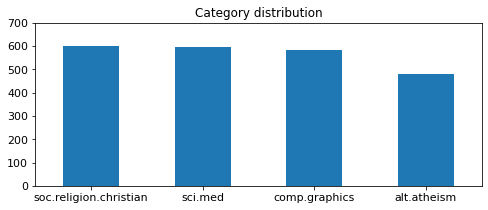

In [57]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [58]:
X_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 561 to 1893
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           1000 non-null   object
 1   category       1000 non-null   int64 
 2   category_name  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.2+ KB


sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


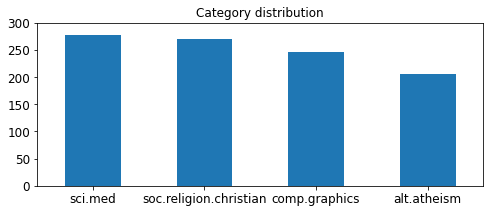

In [59]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of 
hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

277
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


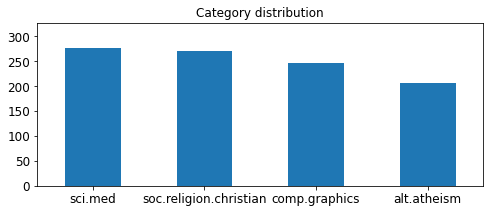

In [62]:
# The Answer to Exercise 7. 2023/10/21

# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64
599
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


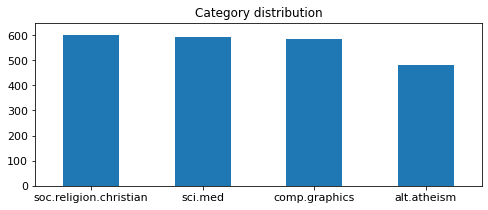

In [65]:
print(X.category_name.value_counts())
print(max(X.category_name.value_counts()))
upper_bound_X = max(X.category_name.value_counts() + 50) #277 + 50
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound_X],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an
excerise. Below we show you an snapshot of the type of chart we are looking for. 

([<matplotlib.axis.XTick at 0x19abccd85c8>,
 [Text(0, 0, 'soc.religion.christian'),
  Text(0, 0, 'sci.med'),
  Text(0, 0, 'comp.graphics'),
  Text(0, 0, 'alt.atheism')])

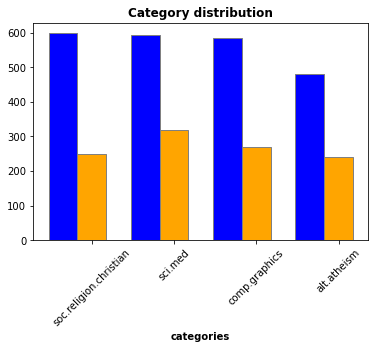

In [67]:
# Answer to Exercise 8
# Create bar positions
barWidth = 0.35
values_blue=X.category_name.value_counts()
r1 = np.arange(len(values_blue))
r2 = [x + barWidth for x in r1]

# Create the bars
plt.bar(r1, values_blue, color='blue', width=barWidth, edgecolor='grey', label='category_name')
plt.bar(r2, values_orange, color='orange', width=barWidth, edgecolor='grey', label='category_name')

# Title & subtitle
plt.title('Category distribution', fontweight='bold')

# X axis
plt.xlabel('categories', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(values_blue))], categories, rotation=45)

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [12]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [13]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something
different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly
speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to
generate a document-term matrix from the original dataset. In other words we are going to be creating something like the
table in the Lab1-Master example.Initially, it won't have the same shape as the table, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [4]:
count_vect.get_feature_names_out()[14887]

'from'

In [5]:
count_vect.get_feature_names_out()[29022]

'sd345'

In [6]:
count_vect.get_feature_names_out()[8696]

'city'

In [7]:
count_vect.get_feature_names_out()[4017]

'ac'

In [8]:
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

What we did with those two lines of code is that we transformed the articles into a **term-document matrix**. Those lines
of code tokenize each article using a built-in, default tokenizer (often referred to as an `analzyer`) and then produces
the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we 
previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. 
Let us look closely at this analyzer. 

In [9]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [ ]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?

In [10]:
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

Now let us look at the term-document matrix we built above.

In [11]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [12]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [13]:
X_counts.shape

(2257, 35788)

In [14]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [15]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the
same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as
efficient as possible.

In [16]:
# Answer here


In [11]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_000', 'term_0000', 'term_0000001200', 'term_000005102000', 'term_0001', 'term_000100255pixel', 'term_00014', 'term_000406', 'term_0007', 'term_000usd', 'term_0010', 'term_001004', 'term_0010580b', 'term_001125', 'term_001200201pixel', 'term_0014', 'term_001642', 'term_00196', 'term_002']


In [12]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [9]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,term_000usd,term_0010,term_001004,term_0010580b,term_001125,term_001200201pixel,term_0014,term_001642,term_00196,term_002
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


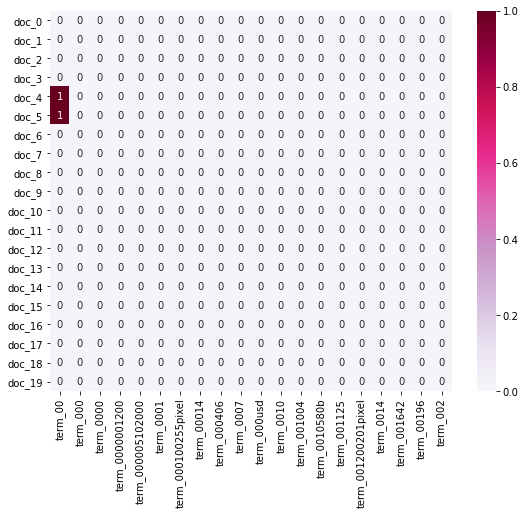

In [13]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [26]:
# Answer here


The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though
we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. 
You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just
a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting 
characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data 
Science. That's the motivation right there!

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. 
I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that 
is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is 
that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our 
data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficiently reduce the dimensions of our data, with the main 
goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it
is very useful for visualizing and observing the characteristics of our dataset. 

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [14]:
from sklearn.decomposition import PCA

In [15]:
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 2)


In [16]:
X_reduced.shape

(2257, 2)

In [21]:
X_reduced

array([[-17.01172954,   0.45016638,  -1.31226076],
       [ -6.80574586,  -1.15880602,  -0.4048828 ],
       [ 15.79461065,   3.62233102,  12.70799022],
       ...,
       [ 19.97508176,  -2.85495806,   1.04076602],
       [163.88523745,  29.52467709,  -8.70178805],
       [-16.58569528,   0.61748551,  -1.88007223]])

In [17]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

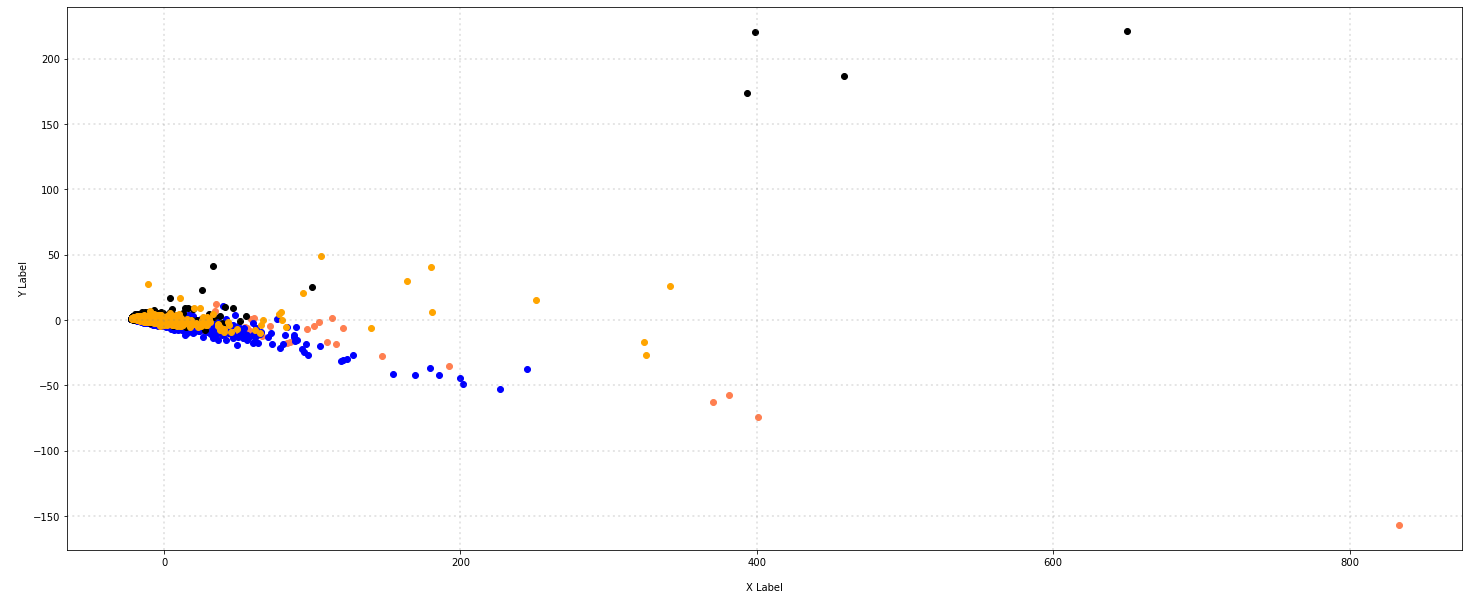

In [18]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

From the 2D visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special 
grouping by category, but it is not immediately clear. The PCA was applied to the raw frequencies and this is considered a 
very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a 
"bag of words" approach. Later on in the course you will learn about different approaches on how to create better features 
from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [19]:
# Answer to Exercise 12, 2023/10/25

print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 3)


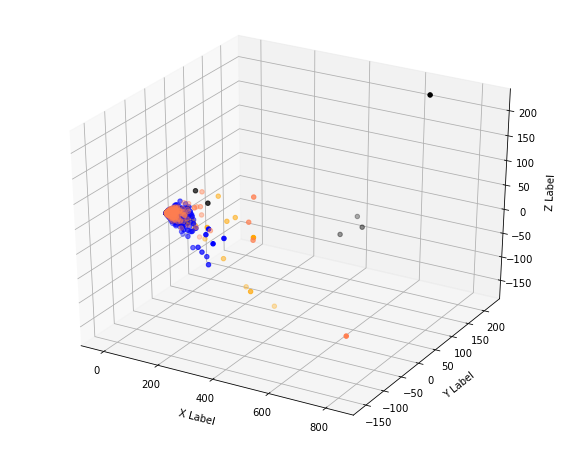

Text(0.08326485485939825, 0.011155375308735104, 'Z-axis')

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data (replace with your dataset)
#data = np.random.rand(2257, 3)
data=X_reduced

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys,zs, c = c, marker='o')
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

# Extract x, y, and z coordinates from your dataset
#x = data[:, 0]
#y = data[:, 1]
#z = data[:, 2]

# Plot the 3D scatter plot
#ax.scatter(x, y, z, c='b', marker='o', label='Data Points')

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set the camera angle (elevation and azimuth) for different views
# view_angles = [(30, 45), (15, 60), (60, 30)]

# for angle in view_angles:
#     ax.view_init(elev=angle[0], azim=angle[1])
#     plt.title(f'View Angle: Elevation={angle[0]}, Azimuth={angle[1]}')
#     plt.show()

# Show the 3D plot
#plt.show()


In [ ]:
### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [26]:
# Answer here
import plotly.graph_objects as go
import numpy as np

# Sample data (replace with your dataset)
data = X_reduced

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=data[:, 0], y=data[:, 1], z=data[:, 2],
                                   mode='markers',
                                   marker=dict(size=4, opacity=0.6),
                                   name='Data Points')])

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title='X-axis',
                             yaxis_title='Y-axis',
                             zaxis_title='Z-axis'))

# Define different camera angles (elevation and azimuth)
view_angles = [(30, 45), (15, 60), (60, 30)]

# Update the camera settings for different views
for angle in view_angles:
    fig.update_layout(scene_camera=dict(eye=dict(x=np.cos(np.deg2rad(angle[1])) * 1.5,
                                                  y=np.cos(np.deg2rad(angle[0])) * np.sin(np.deg2rad(angle[1])) * 1.5,
                                                  z=np.sin(np.deg2rad(angle[0])) * np.sin(np.deg2rad(angle[1])) * 1.5)))

    # Show the plot for the current view
    fig.show()


In [35]:
data

array([[-17.01172954,   0.45016638,  -1.31226076],
       [ -6.80574586,  -1.15880602,  -0.4048828 ],
       [ 15.79461065,   3.62233102,  12.70799022],
       ...,
       [ 19.97508176,  -2.85495806,   1.04076602],
       [163.88523745,  29.52467709,  -8.70178805],
       [-16.58569528,   0.61748551,  -1.88007223]])

In [58]:
import plotly.express as px
import pandas as pd

import plotly.graph_objects as go
import numpy as np

# Sample data (replace with your dataset)
# data = np.random.rand(2257, 3)
data = X_reduced  # Assuming X_reduced is your dataset

# Sample categories and corresponding colors
categories = ['Category1', 'Category2', 'Category3', 'Category4']
col = ['coral', 'blue', 'black', 'orange']
#col = ['coral', 'blue', 'black', 'orange']

# Create a DataFrame with the data
#df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])
#df['Category'] = np.random.choice(categories, len(df))

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    #fig = px.scatter_3d(data, x=xs, y=ys, z=zs, color=c)
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(xs, ys, zs,
                           mode='markers',
                           marker=dict(size=4, color=c, opacity=0.6))
                  

#fig.update_layout(scene=dict(xaxis_title='X-axis',
#                             yaxis_title='Y-axis',
#                             zaxis_title='Z-axis'))

# Show the 3D plot
fig.show()                      
    #ax.scatter(xs, ys,zs, c = c, marker='o')
# Create a 3D scatter plot using Plotly Express
#'Category', color_discrete_sequence=col
#    fig = px.scatter_3d(data, x=xs, y=ys, z=zs, color=c)
   
# Set labels for the axes
#fig.update_layout(scene=dict(xaxis_title='X-axis',
#                            yaxis_title='Y-axis',
#                             zaxis_title='Z-axis'))

# Show the 3D plot
#fig.show()


# import plotly.graph_objects as go
# import numpy as np

# # Sample data (replace with your dataset)
# data1 = np.random.rand(100, 3)  # First set of data points
# data2 = np.random.rand(100, 3)  # Second set of data points

# # Create a 3D scatter plot for the first set of data points (color 1)
# fig = go.Figure()
# fig.add_trace(go.Scatter3d(x=data1[:, 0], y=data1[:, 1], z=data1[:, 2],
#                            mode='markers',
#                            marker=dict(size=4, color='blue', opacity=0.6),
#                            name='Data Set 1'))


SyntaxError: invalid syntax (<ipython-input-58-3c35f5120651>, line 36)

In [ ]:
import plotly.express as px
import pandas as pd

# Sample data (replace with your dataset)
# data = np.random.rand(2257, 3)
data = X_reduced  # Assuming X_reduced is your dataset

# Sample categories and corresponding colors
categories = ['Category1', 'Category2', 'Category3', 'Category4']
col = ['coral', 'blue', 'black', 'orange']

# Create a DataFrame with the data
df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])
df['Category'] = np.random.choice(categories, len(df))

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Category', color_discrete_sequence=col)

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title='X-axis',
                             yaxis_title='Y-axis',
                             zaxis_title='Z-axis'))

# Show the 3D plot
fig.show()



In [28]:
import plotly.graph_objects as go
import numpy as np

# Sample data (replace with your dataset)
# data = np.random.rand(2257, 3)
data = X_reduced  # Assuming X_reduced is your dataset

# Sample categories and corresponding colors
categories = ['Category1', 'Category2', 'Category3', 'Category4']
col = ['coral', 'blue', 'black', 'orange']

# Create a 3D scatter plot
fig = go.Figure()

for c, category in zip(col, categories):
    xs = data[X['category_name'] == category][:, 0]
    ys = data[X['category_name'] == category][:, 1]
    zs = data[X['category_name'] == category][:, 2]

    fig.add_trace(go.Scatter3d(x=xs, y=ys, z=zs,
                               mode='markers',
                               marker=dict(size=4, color=c, opacity=0.6),
                               name=category))

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title='X-axis',
                             yaxis_title='Y-axis',
                             zaxis_title='Z-axis'))

# Define different camera angles (elevation and azimuth)
view_angles = [(30, 45), (15, 60), (60, 30)]

# Update the camera settings for different views
for angle in view_angles:
    fig.update_layout(scene_camera=dict(eye=dict(x=np.cos(np.deg2rad(angle[1])) * 1.5,
                                                  y=np.cos(np.deg2rad(angle[0])) * np.sin(np.deg2rad(angle[1])) * 1.5,
                                                  z=np.sin(np.deg2rad(angle[0])) * np.sin(np.deg2rad(angle[1])) * 1.5)))

    # Show the plot for the current view
    fig.show()


In [ ]:
### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both 
compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


### 5.5 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity
problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles.
Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have 
to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take
the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of 
words. Let us get into it!

First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add 
values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, 
which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you
get the idea of what that includes.  

In [17]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

35788


In [ ]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [ ]:
term_frequencies[0] #sum of first term: 00

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [ ]:
### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [18]:
# Answer here


In [ ]:
### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both 
compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [19]:
# Answer here


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [21]:
# Answer here

In [ ]:
Since we already have those term frequencies, we can also transform the values in that vector into the log distribution.
All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency 
vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to
visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In
other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [60]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

NameError: name 'term_frequencies' is not defined

NameError: name 'term_frequencies_log' is not defined

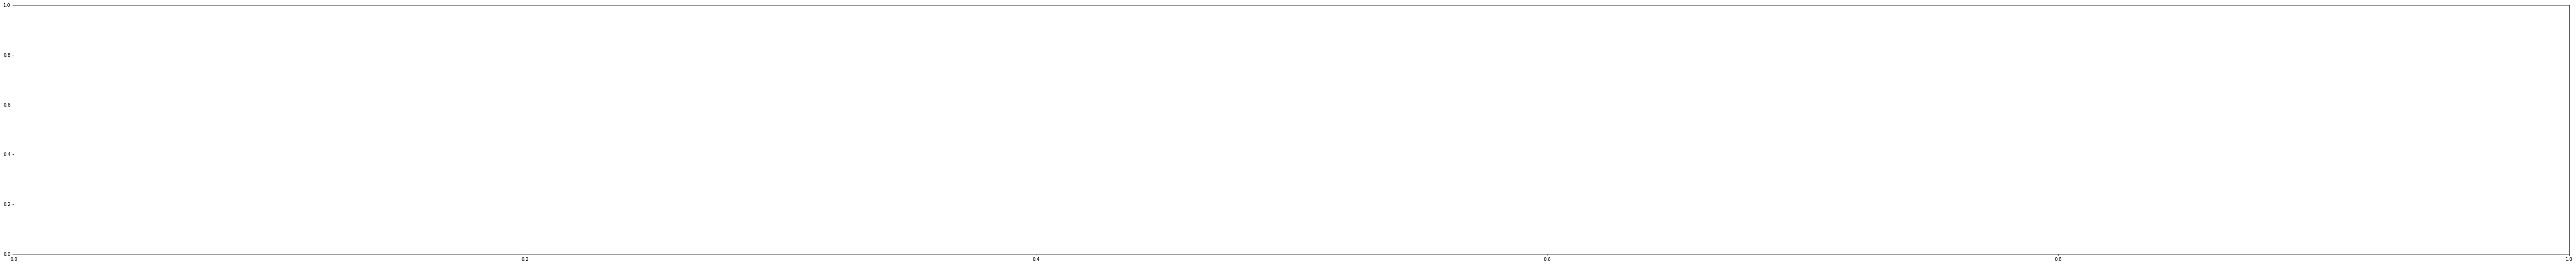

In [61]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [ ]:
Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in 
our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting 
effect. Go for it!

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, 
specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. 
Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary
attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes.
The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to
it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as
you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we
refer to the concepts. Let us take a look at what we want to achieve in code. 

In [62]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [63]:
mlb = preprocessing.LabelBinarizer()

In [65]:
mlb.fit(X.category)

LabelBinarizer()

In [66]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [67]:
X[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


In [ ]:
Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called 
`bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category 
we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to 
any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called
**Discretization** (please refer to the text book for more inforamation).

In [ ]:
### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here


In [68]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [69]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [70]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [71]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000
